<a href="https://colab.research.google.com/github/renanalencar/projeto-md-emocoes/blob/main/Assign9_BaseEstresse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Dados

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
arquivo_tedio = "/content/drive/Shareddrives/MINERAÇÃO DE DADOS ENG74291/Database/dadosEstresseB.xlsx"
df_tedio = pd.read_excel(arquivo_tedio)

# CSV apenas com as emoções. Pontos euclidianos foram removidos
# deixar no dataframe somente com as linhas correspondentes ao game_id 1
df_tedio = df_tedio.drop(columns=['game_name','p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9', 'p10', 'p11', 'p12', 'p13', 'p14', 'p15', 'p16', 'p17', 'p18', 'p19', 'p20', 'p21', 'p22', 'p23','p24'])

filtro  = df_tedio["game_id"] == 1
df_tedio = df_tedio[filtro]

# visualizar as 8 primeiras entradas do df
df_tedio.head(8)

,game_id,uuid,timestamp,angry,disgusted,fear,sad,surprised,happy
0,1,6,1605708889053,0.100790,0.192510,0.020056,0.143483,0.035893,0.036650
1,1,6,1605708889565,0.117206,0.294099,0.019053,0.091390,0.008923,0.050300
2,1,6,1605708890069,0.099648,0.265178,0.022462,0.098231,0.013674,0.051873
3,1,6,1605708890586,0.125407,0.308587,0.020549,0.103317,0.009624,0.041843
4,1,6,1605708891107,0.112386,0.299351,0.021350,0.106606,0.010373,0.046205
5,1,6,1605708891614,0.116339,0.314887,0.024295,0.125171,0.010312,0.040529
6,1,6,1605708892128,0.102454,0.272277,0.020551,0.090256,0.013013,0.054382
7,1,6,1605708892641,0.146948,0.356513,0.023564,0.106481,0.009985,0.031880


In [ ]:
# verificar o tamanho do df
print("Variáveis:\t {}".format(df_tedio.shape[1]))
print("Entradas:\t {}".format(df_tedio.shape[0]))

Variáveis:	 9
Entradas:	 17892


In [ ]:
# vizualisar os nomes das colunas
df_tedio.columns

Index(['game_id', 'uuid', 'timestamp', 'angry', 'disgusted', 'fear', 'sad',
       'surprised', 'happy'],
      dtype='object')

In [ ]:
# descobrir os tipos das variáveis
df_tedio.dtypes

game_id        int64
uuid           int64
timestamp      int64
angry        float64
disgusted    float64
fear         float64
sad          float64
surprised    float64
happy        float64
dtype: object

## 1.2 Criando classes para a base de dados

In [ ]:
# função para classificar os dados como tédio (1) ou estresse (0)
def def_tedio(c):
  if c['angry'] >= 0.1 and c['disgusted'] >= 0.1:
    return 1
  elif c['sad'] >= 0.1 and c['surprised'] >= 0.1:
    return 1
  else:
    return 0

In [ ]:
# criar a coluna 'target' para o df_tedio
df_tratado = pd.DataFrame(df_tedio)

df_tratado['target'] = df_tedio.apply(def_tedio, axis=1)

df_tratado.head(8)

,game_id,uuid,timestamp,angry,disgusted,fear,sad,surprised,happy,target
0,1,6,1605708889053,0.100790,0.192510,0.020056,0.143483,0.035893,0.036650,1
1,1,6,1605708889565,0.117206,0.294099,0.019053,0.091390,0.008923,0.050300,1
2,1,6,1605708890069,0.099648,0.265178,0.022462,0.098231,0.013674,0.051873,0
3,1,6,1605708890586,0.125407,0.308587,0.020549,0.103317,0.009624,0.041843,1
4,1,6,1605708891107,0.112386,0.299351,0.021350,0.106606,0.010373,0.046205,1
5,1,6,1605708891614,0.116339,0.314887,0.024295,0.125171,0.010312,0.040529,1
6,1,6,1605708892128,0.102454,0.272277,0.020551,0.090256,0.013013,0.054382,1
7,1,6,1605708892641,0.146948,0.356513,0.023564,0.106481,0.009985,0.031880,1


In [ ]:
# verificar o tipo de dado de cada coluna
df_tratado.dtypes

game_id        int64
uuid           int64
timestamp      int64
angry        float64
disgusted    float64
fear         float64
sad          float64
surprised    float64
happy        float64
target         int64
dtype: object

In [ ]:
# verificar que colunas tem valores NaN (Not a Number)
df_tratado.isnull().any()

game_id      False
uuid         False
timestamp    False
angry         True
disgusted     True
fear          True
sad           True
surprised     True
happy         True
target       False
dtype: bool

In [ ]:
# Completando os registros que tem valor NaN com 0.0
df_tratado = df_tratado.fillna(0.0)

## 1.3 Conjunto de dados para treinamento e teste

In [ ]:
# criar os conjuntos de dados e classes para treinamento e teste
from sklearn.model_selection import train_test_split

X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(df_tratado.drop(columns=['target']), df_tratado.target, test_size=0.3)

## 1.4 Correlação
Baseado em [Como selecionar as melhores features para seu modelo de Machine Learning](https://paulovasconcellos.com.br/como-selecionar-as-melhores-features-para-seu-modelo-de-machine-learning-2e9df83d062a)

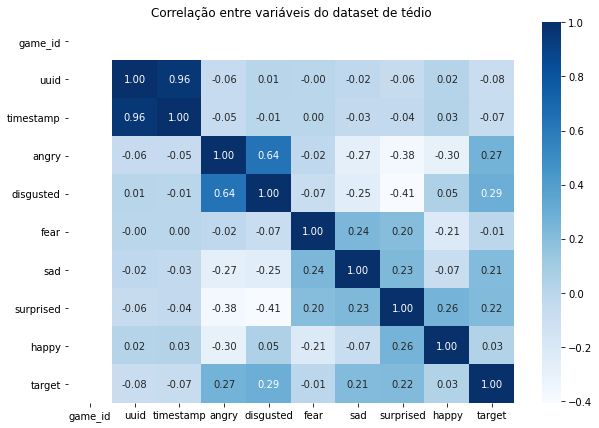

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 7))
sns.heatmap(df_tratado.corr(),
            annot = True,
            fmt = '.2f',
            cmap='Blues')
plt.title('Correlação entre variáveis do dataset de tédio')
plt.show()

O valor mostrado para cada correlação vai de -1 — que indica uma correlação negativa perfeita — a +1 — uma correlação positiva perfeita. Vale lembrar que a função .corr() traz, por padrão, a correlação de Pearson, mostrando um relacionamento linear entre as variáveis. Em casos onde há um relacionamento não-linear, a matriz pode não ser uma boa medida.

## 1.5 Feature Importance
O feature_importance_ retornar um array onde cada elemento dele é uma feature do seu modelo. Ele irá dizer, em proporções, quão importante aquela feature é para o modelo, onde quanto maior o valor, mais importante a feature é para o modelo.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf_RFC  = RandomForestClassifier()
clf_RFC.fit(X_treinamento, y_treinamento)

# Mostrando importância de cada feature
clf_RFC.feature_importances_

array([0.        , 0.01449059, 0.01354798, 0.25676472, 0.24000077,
       0.01580924, 0.18539711, 0.24153191, 0.03245769])

É retornado um array com quatro elementos. Se você somar todos eles, verá que o resultado será 1. Ao analisar esse array, podemos ver que a feature mais importante para o algoritmo Floresta Randômica foi a variável 'surprised'.

Text(0.5, 1.0, 'Importância de cada feature')

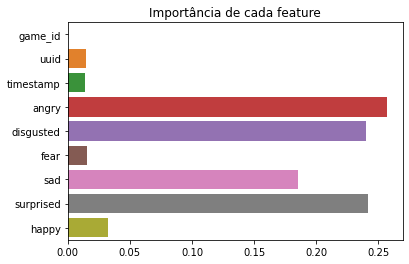

In [ ]:
importances = pd.Series(data=clf_RFC.feature_importances_, index=df_tratado.columns[0:9])
sns.barplot(x=importances, y=importances.index, orient='h').set_title('Importância de cada feature')

As vezes, os valores mostrados pelo feature_importances_ pode ser enviesado dependendo dos parâmetros definidos na criação do objeto. Evitar usar os parâmetros default do Floresta Randômica.

# 2. Regressões

## 2.1 Regressão Linear Simples e Multipla


*   [Linear Regression Example](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html)
*   [Implementando Regressão Linear Simples em Python](https://medium.com/data-hackers/implementando-regress%C3%A3o-linear-simples-em-python-91df53b920a8)
*   [Regressão Linear](https://www.kaggle.com/marilivb/4-regress-o-linear)
*   [https://www.datageeks.com.br/regressao-linear/](https://www.datageeks.com.br/regressao-linear/)

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
# Criar um objeto de regressão linear
regr = linear_model.LinearRegression()

# Treinar o modelo usando os conjuntos de treinamento
regr.fit(X_treinamento, y_treinamento)

# Fazer predições usando o conjunto de teste
y_pred = regr.predict(X_teste)

In [ ]:
# Os coeficientes encontrados
print('Coeficientes: \n', regr.coef_)
# O Erro Médio Quadrático (EMQ)
print('Erro Médio Quadrático (EMQ): %.2f'
      % mean_squared_error(y_teste, y_pred))
# O coeficiente de determinação: 1 é a predição perfeita
print('Coeficiente de determinação: %.2f'
      % r2_score(y_teste, y_pred))

Coeficientes: 
 [ 0.00000000e+00 -1.43148094e-03  2.41792521e-11  7.61391122e-01
  9.36520471e-01 -6.55732026e-01  7.41510975e-01  1.14651013e+00
 -5.18287604e-02]
Erro Médio Quadrático (EMQ): 0.16
Coeficiente de determinação: 0.35


### 2.1.1 Diagrama de Dispersão

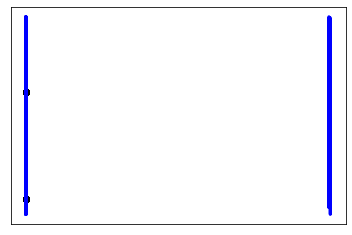

In [ ]:
# plotar saídas
plt.scatter(X_teste.iloc[:,0].values, y_teste,  color='black')
plt.plot(X_teste, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

## 2.2 Regressão Logística


*   [Logistic Regression using Python (scikit-learn)](https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a)
*   [Regressão Logística e Métricas de Classificação em Python](http://neylsoncrepalde.github.io/2019-11-25-regressao_logistica_python/)



In [ ]:
from sklearn.linear_model import LogisticRegression

clf_LR = LogisticRegression(random_state=0).fit(X_treinamento, y_treinamento)
clf_LR.predict(X_teste)

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
clf_LR.predict_proba(X_teste)

array([[0.44259396, 0.55740604],
       [0.44258267, 0.55741733],
       [0.44259411, 0.55740589],
       ...,
       [0.44240196, 0.55759804],
       [0.44233993, 0.55766007],
       [0.44264688, 0.55735312]])

In [ ]:
clf_LR.score(X_treinamento, y_treinamento)

0.5575694666240818

### 2.2.1 Diagrama de Dispersão

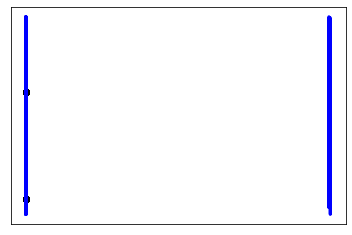

In [ ]:
# plotar saídas
plt.scatter(X_teste.iloc[:,0].values, y_teste,  color='black')
plt.plot(X_teste, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

# 3. Detecção de anomalias
Referências:


*   [Anomaly Detection Techniques in Python](https://medium.com/learningdatascience/anomaly-detection-techniques-in-python-50f650c75aaf)
*   [4 Automatic Outlier Detection Algorithms in Python](https://machinelearningmastery.com/model-based-outlier-detection-and-removal-in-python/)
*   [Learn how to develop highly accurate models to detect anomalies using Artificial Neural Networks with the Tensorflow library in Python3.](https://outline.com/D8jZMf)


## 3.1 Métodos Estatísticos

### 3.1.1 Paramétricos: Diagrama de Caixa

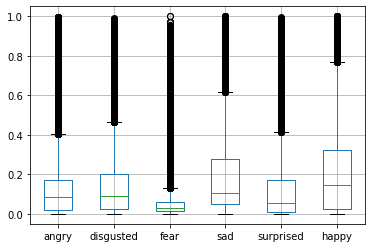

In [ ]:
boxplot = df_tratado.boxplot(column=['angry', 'disgusted', 'fear', 'sad', 'surprised', 'happy'])

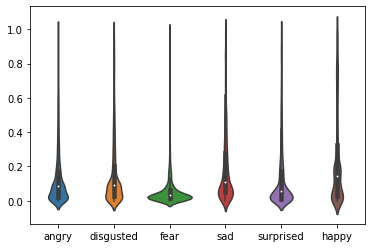

In [ ]:
df_emocoes = df_tratado.copy(deep=True)
df_emocoes = df_emocoes.drop(columns=['game_id', 'uuid', 'timestamp', 'target'])
ax = sns.violinplot(data=df_emocoes)

### 3.1.2 Não Paramétricos: Análise de Histograma

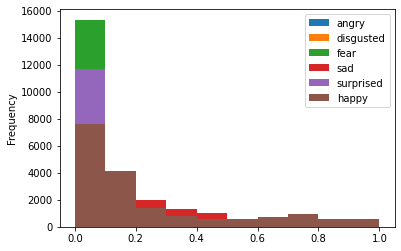

In [ ]:
#ax = df_emocoes.plot.hist(bins=12, alpha=0.5)
ax = df_emocoes.plot.hist()

## 3.2 Métodos Algorítmicos

### 3.2.1 Proximidade: Local Outlier Factor (LOF)
Referências:

*   [2.7. Novelty and Outlier Detection](https://scikit-learn.org/stable/modules/outlier_detection.html)
*   [sklearn.neighbors.LocalOutlierFactor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.LocalOutlierFactor.html)
*   [Outlier detection with Local Outlier Factor (LOF)](https://scikit-learn.org/stable/auto_examples/neighbors/plot_lof_outlier_detection.html)
*   [Anomaly detection with Local Outlier Factor (LOF)](https://towardsdatascience.com/anomaly-detection-with-local-outlier-factor-lof-d91e41df10f2)

### 3.2.2 Redes Neurais: Redes Neurais Supervisionadas
Referências:


*   [Comparing anomaly detection algorithms for outlier detection on toy datasets](https://scikit-learn.org/0.20/auto_examples/plot_anomaly_comparison.html)
*   [How to use machine learning for anomaly detection and condition monitoring](https://towardsdatascience.com/how-to-use-machine-learning-for-anomaly-detection-and-condition-monitoring-6742f82900d7)



## 3.3 Machine Learning

### 3.3.1. Árvores de decisão

### 3.3.2 Florestas de isolamento (*Isolation Forest*)
Referências:

*   [2.7. Novelty and Outlier Detection](https://scikit-learn.org/stable/modules/outlier_detection.html)
*   [sklearn.ensemble.IsolationForest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html)
*   [Anomaly Detection with Isolation Forest & Visualization](https://towardsdatascience.com/anomaly-detection-with-isolation-forest-visualization-23cd75c281e2)
*   [Anomaly Detection Using Isolation Forest in Python](https://blog.paperspace.com/anomaly-detection-isolation-forest/)


In [ ]:
from sklearn.ensemble import IsolationForest
model=IsolationForest(n_estimators=50, max_samples='auto', contamination=float(0.1),max_features=1.0)
model.fit(df_emocoes[['angry']])

IsolationForest(behaviour='deprecated', bootstrap=False, contamination=0.1,
                max_features=1.0, max_samples='auto', n_estimators=50,
                n_jobs=None, random_state=None, verbose=0, warm_start=False)

In [ ]:
df = pd.DataFrame(df_emocoes['angry'])
df['scores']=model.decision_function(df[['angry']])
df['anomaly']=model.predict(df[['angry']])
df.head(20)

,angry,scores,anomaly
0,0.100790,0.077722,1
1,0.117206,0.069248,1
2,0.099648,0.081151,1
3,0.125407,0.051632,1
4,0.112386,0.067172,1
5,0.116339,0.071265,1
6,0.102454,0.075620,1
7,0.146948,0.070668,1
8,0.115245,0.071281,1
9,0.111384,0.067728,1


In [ ]:
anomaly=df.loc[df['anomaly']==-1]
anomaly_index=list(anomaly.index)
print(anomaly)

          angry    scores  anomaly
227    0.424647 -0.016277       -1
231    0.421033 -0.022580       -1
244    0.416160 -0.015536       -1
247    0.417516 -0.020451       -1
248    0.602134 -0.049729       -1
...         ...       ...      ...
17523  0.541233 -0.041268       -1
17524  0.590231 -0.049098       -1
17525  0.611031 -0.051791       -1
17526  0.530088 -0.041367       -1
17527  0.373109 -0.000037       -1

[1785 rows x 3 columns]


In [ ]:
outliers_counter = len(df[df['angry'] > 0.5])
outliers_counter

1121

In [ ]:
print("Accuracy percentage:", 100*list(df['anomaly']).count(-1)/(outliers_counter))

Accuracy percentage: 159.2328278322926


In [ ]:
#specify the 12 metrics column names to be modelled
to_model_columns=df_emocoes[0:7]
to_model_columns

clf=IsolationForest(n_estimators=100, max_samples='auto', contamination=float(.12), max_features=1.0, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)
clf.fit(df_emocoes)
pred = clf.predict(df_emocoes)
df_emocoes['anomaly']=pred
outliers=df_emocoes.loc[df_emocoes['anomaly']==-1]
outlier_index=list(outliers.index)
print(outlier_index)
#Find the number of anomalies and normal points here points classified -1 are anomalous
print(df_emocoes['anomaly'].value_counts())

[210, 364, 365, 374, 377, 378, 379, 387, 389, 390, 398, 399, 400, 401, 402, 403, 404, 407, 408, 427, 428, 429, 431, 432, 436, 438, 445, 454, 455, 458, 459, 460, 461, 469, 470, 472, 473, 477, 478, 487, 488, 511, 512, 513, 519, 520, 521, 524, 525, 576, 577, 578, 579, 592, 593, 613, 614, 616, 623, 697, 699, 700, 765, 776, 777, 779, 780, 781, 782, 783, 784, 785, 786, 787, 788, 789, 790, 791, 793, 794, 795, 796, 797, 798, 799, 800, 801, 802, 809, 810, 811, 1099, 1104, 1339, 1348, 1351, 1354, 1356, 1363, 1364, 1369, 1370, 1371, 1372, 1377, 1378, 1381, 1404, 1459, 1460, 1469, 1473, 1487, 1583, 1584, 1585, 1596, 1600, 1601, 1602, 1603, 1604, 1611, 1612, 1614, 1615, 1617, 1618, 1620, 1621, 1628, 1632, 1633, 1664, 1671, 1672, 1673, 1674, 1675, 1676, 1677, 1678, 1680, 1681, 1682, 1683, 1684, 1685, 1686, 1687, 1688, 1689, 1690, 1691, 1694, 1696, 1697, 1698, 1706, 1707, 1732, 1733, 1734, 1735, 1745, 1746, 1751, 1752, 1754, 1760, 1769, 1772, 1776, 1777, 1778, 1783, 1786, 1800, 1801, 1802, 1860, 1861

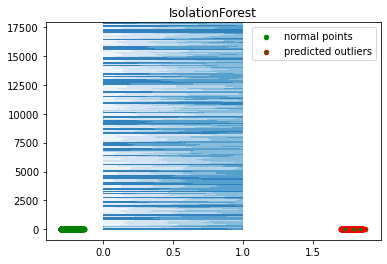

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(2)
pca.fit(df_emocoes)
res=pd.DataFrame(pca.transform(df_emocoes))
Z = np.array(res)
plt.title("IsolationForest")
plt.contourf( Z, cmap=plt.cm.Blues_r)
b1 = plt.scatter(res[0], res[1], c='green', s=20,label="normal points")
b1 =plt.scatter(res.iloc[outlier_index,0],res.iloc[outlier_index,1], c='green',s=20,  edgecolor="red",label="predicted outliers")
plt.legend(loc="upper right")
plt.show()

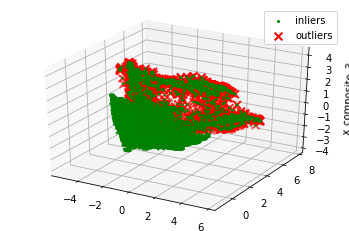

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
pca = PCA(n_components=3)  # Reduce to k=3 dimensions
scaler = StandardScaler()
#normalize the metrics
X = scaler.fit_transform(df_emocoes)
X_reduce = pca.fit_transform(X)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_zlabel("x_composite_3")# Plot the compressed data points
ax.scatter(X_reduce[:, 0], X_reduce[:, 1], zs=X_reduce[:, 2], s=4, lw=1, label="inliers",c="green")# Plot x's for the ground truth outliers
ax.scatter(X_reduce[outlier_index,0],X_reduce[outlier_index,1], X_reduce[outlier_index,2],
           lw=2, s=60, marker="x", c="red", label="outliers")
ax.legend()
plt.show()